In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Custom imports
from matplotlib.cm import jet
from math import ceil, pi
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

In [3]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Prof. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

# Chapter 8 - Material for lecture

# Summary

### 8.1 Decision making

Hypothesis testing is essentially decision making.
This is linked to interpreting results that were obtained in a statistical test.

#### 8.1.1 Introductory examples

In general we need the following to conduct a hypothesis test:
- The assertion that some hypothesis is true,
- A numerical test that is to be applied to data, and
- A hypothesis that is accepted or rejected depending on the outcome of the test.

#### 8.1.2 Hypotheses

Hypotheses are statements that are either true or false. **Simple hypotheses** define the probability distribution function completely. **Composite hypotheses** combine several probability distribution functions.

#### 8.1.3 Alternative hypotheses

In hypothesis tests we often compare to alternative hypothses.

In general, it is crucial to distinguish between one-tailed directional and two-tailed non-directional tests. 
A two-tailed test refers to the comparison of a test outcome to a value where we don't care of whether the outcome is less than or greater than the value.
In the directional test the sign of the difference between test outcome and comparison value is of importance.


#### 8.1.4 Type I/II errors

The two cases where there is a mismatch between the hypothesis being true or false and the decision taken based on the test are called Type I and Type II error according to the following pattern:

| Hypothesis \ Decision | accept | reject |
|:-------------------|:----------:|:----------:|
| **true** | :) | Type I error |
| **false** | Type II error | :) |

#### 8.1.5 Significance and Power

**Significance**

Type I errors are inevitable and the rate at which they occur is called significance.
The significance, $\alpha$, is the integral of the probability distribution of the hypothesis over the rejection region:

$$\alpha=\int_{Reject}P_H(x)dx.$$

**Power**

Considering the alternative hypothesis, we can define the integral of the probability distribution of the alternative hypothesis over the acceptance region, in other words the rate of Type II errors, as

$$\beta=\int_{Accept}P_A(x)dx,$$

or, by integrating of the rejection region as above, we get

$$1-\beta=\int_{Reject}P_A(x)dx,$$

where $1-\beta$ is called the power of the test.

### 8.2 Practical examples

#### 8.2.1 Hypothesis tests with a discrete distribution

In a Poisson test of the hypothesis that a counting experiment results in a count compatible with a certain mean $\lambda$ or smaller is:
$$1-\alpha\lt\int_{Accept}Poisson(x;\lambda)dx=\sum_{x=0}^{n}Poisson(x;\lambda)$$
for significance $\alpha$ and $n$ the limit of the acceptance region. 

#### 8.2.3 Interpreting experiments: null hypothesis

We can only ever reject a hypothesis with great confidence, but not accept it. For any theory we want to test, we have to formulate the opposite hypothesis and aim to falsify this. This hypothesis is called the null hypothesis, $H_0$.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

# Recap

#### 8.2.2 Hypotheses and alternative hypotheses

##### Example: Identifying Mars rocks

There has been no return mission to Mars, so all Martian rocks on earth came through being ejected from the surface of Mars by a meterorite impact and then having found their way to us. Their identity is compared to in-situ measurements by probes on the surface of Mars.

The following plot is from E.M. Stolper et al., Science 6153 (2013) 1239463.

<img src="images/F3.large.jpg" width=60%>

<img src="images/F3.large_zoom.jpg" width=80%>

We can now set the hypothesis that a sample is of Martian origin and set the alternative hypothesis that a sample is from earth. 

Let's focus here on the $TiO_2$ content, i.e. ignore the correlation of different concentrations. In order to do so, I have extracted the $TiO_2$ content distributions by eye and obtained the following data.

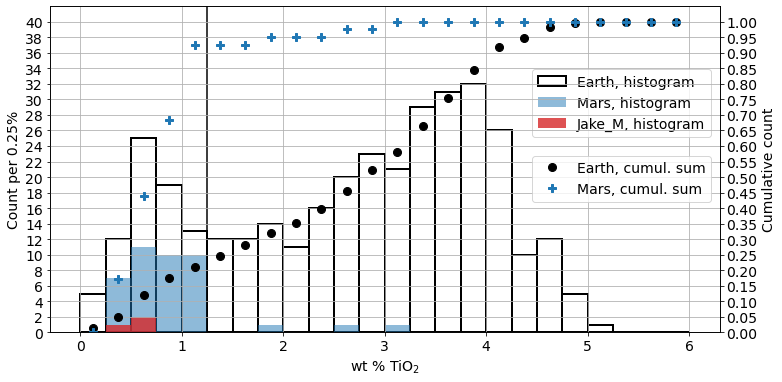

In [5]:
xx = np.linspace(0.125,5.875,24)
earth_data = [5,12,25,19, 13,12,12,14, 11,16,20,23, 21,29,31,32, 26,10,12,5, 1,0,0,0]
mars_data = [0,7,11,10, 10,0,0,1, 0,0,1,0, 1,0,0,0, 0,0,0,0, 0,0,0,0]
test_data = [0,1,2,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]

earth_sum = np.cumsum(earth_data)               # calculate cumulative sum of data points above
earth_total = earth_sum[-1]                     # determine total
earth_sum = [i/earth_total for i in earth_sum] # normalise cumulative sum

mars_sum = np.cumsum(mars_data)
mars_total = mars_sum[-1]
mars_sum = [i/mars_total for i in mars_sum]
test_sum = np.cumsum(test_data)
test_total = test_sum[-1]
test_sum = [i/test_total for i in test_sum]

fig,ax1 = plt.subplots(figsize=(12,6))

# plot histograms
ax1.bar(xx,earth_data,width=0.25,fill=False,label='Earth, histogram',linewidth=2,edgecolor='k')
ax1.bar(xx,mars_data,width=0.25,alpha=0.5,label='Mars, histogram',color='tab:blue')
ax1.bar(xx,test_data,width=0.25,alpha=0.8,label='Jake_M, histogram',color='tab:red')
# optics, part 1
ax1.set_yticks([x*2. for x in range(21)])
plt.ylim(0,42)
ax1.grid(which='both',axis='x')
ax1.tick_params(axis='y', labelcolor='k')
ax1.legend(loc=[0.72,0.6])
ax1.set_xlabel('wt % TiO$_2$')
ax1.set_ylabel('Count per 0.25%', color='k')

# plot cumulative distributions
ax2 = ax1.twinx()
ax2.plot(xx,earth_sum, 'bo', ms=8, label='Earth, cumul. sum',color='k')
ax2.plot(xx,mars_sum, 'bP', ms=8, label='Mars, cumul. sum',color='tab:blue')

# optics, part 2
ax2.set_yticks([x/20. for x in range(21)])
ax2.grid(which='major',axis='y')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc=[0.72,0.4])
plt.ylim(0,1.05)
ax2.set_ylabel('Cumulative count', color='k')


ax1.plot([1.25,1.25],[0,42],color='k')

plt.show()

Defining the acceptance region for the alternative hypothesis (earth-like) as $>1.25\%$, we would wrongly reject about $7\%$ of Martian rocks, i.e. $\alpha=7\%$, and we would wrongly accept about $21\%$ of earth rock samples, hence $\beta=21\%$, which means the power is $79\%$.

The sample analysed in this paper are the Jake\_M rocks, for which we would reject the alternative hypothesis of being of earth origin in this test. A power of $79\%$ may not be very satisfactory in this context and the correlation shown in the plots illustrate that a combined analysis of all available input would be much preferrable. We will get back to this topic in Chapter 11.

This example tests the hypothesis that there is no preference in a cohort between blue and red at the 10% significance level.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

# Example

In [3]:
nBlue = 17               # as surveyed
nRed  = 39               # as surveyed
nStudents = nBlue + nRed
cl    = 0.90             # 1 - significance
p     = 0.50             # example probability (null hypothesis)

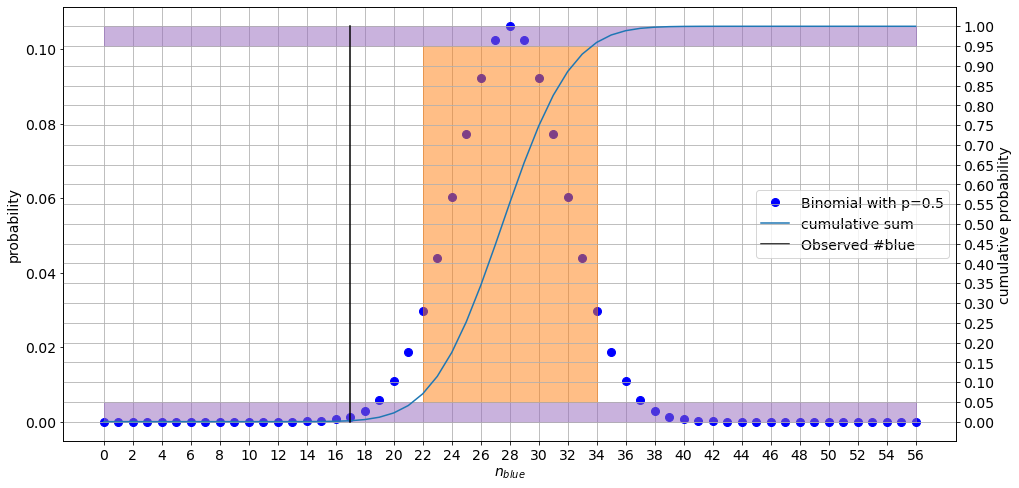

In [4]:
x = range(nStudents+1) # list of integers from 0 to nStudents
n = nStudents
limlow = (1-cl)/2      # lower limit of central confidence interval
limhigh = 1-limlow     # upper limit of central confidence interval
rv = binom(n, p)       # initialise binomial distribution
probs = rv.pmf(x)      # calculate binomial probabilities for all values of x and return list
ints = np.cumsum(probs, dtype=float) # calculate cumulative sum of probabilities

# work out limits of confidence interval based on cumulative sum of probabilities
x_low = 0
x_high = nStudents
for i in x:
    if ints[i]<limlow: x_low = i
    if ints[n-i]>limhigh: x_high = n-i
x_low += 1
        
# prepare two plots with common x axis
#plt.xkcd()
fig,ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xticks(x[0::2])
ax2 = ax1.twinx()

# draw two bands indicating the excluded part of the confidence level
pp = PatchCollection([Rectangle((0,0),n,limlow),
                      Rectangle((0,limhigh),n,limlow)],
                     alpha=0.5, color='tab:purple', label='outside CL')

# draw a rectangle indicating the selected confidence interval
pp2 = PatchCollection([Rectangle((x_low,limlow),x_high-x_low,cl)],
                      alpha=0.5, color='tab:orange', label='selected range')

# add these to the plot
ax2.add_collection(pp)
ax2.add_collection(pp2)

# plot the probability distribution
ax1.plot(x,probs, 'bo', ms=8, label='Binomial with p=0.5')

# plot the cumulative integral
ax2.plot(x,ints, '-', ms=8, label='cumulative sum')

ax2.plot([nBlue,nBlue],[0,1],'-', color='k', label='Observed #blue')

# plot optics
ax2.set_yticks([x/20. for x in range(21)])
ax1.grid(which='both',axis='x')
ax2.grid(which='major',axis='y')
ax1.set_xlabel('$n_{blue}$')
ax1.set_ylabel('probability')
ax2.set_ylabel('cumulative probability')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=5)

plt.show()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>